# Plant your fractal tree

We start by importing some packages we need for computation (numpy) and plotting (matplotlib).

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Then we decide on some characteristics of our future tree.
We set the maximum number of iterations. This number specifies the number of branchings out of the tree (not counting the initial trunk). The computation gets slow very fast for large maximum iterations. Better choose not more then 10 for a start.

In [147]:
number_of_iterations = 9

How long is each branch supposed to be compared to its predecessor? You choose this by means of a scaling factor. The initial trunk has a length of 1.0 . The length of each sublevel branch is scaled by `scale_factor`.

In [141]:
scale_factor         = 0.8          

Is your tree supposed to stand upright or is it suffering under a heavy storm? You choose this property by setting the `starting_angle` in degrees. Choose 90° for an upright trunk.

In [142]:
starting_angle       = 90           

Now you choose the direction of the new branches. In each iteration two branches are built at the end of each existing branch. Choose two angles representing the rotation between the trajectory of the old and new branch. For the computation, the values `+branch_angles[0]` and `-branch_angles[1]` are used, respectively. This means that identical angles give you a symmetrical tree.

In [143]:
branch_angles        = [15, 15]

## We need a recursive function to calculate the coordinates of all tree branches and plot them.
Therefore we define the function `branchOut`. Within each call of the function, the length of the current branch and its coordinates are calculated. The branch is plotted. If the maximum number of iterations (`number_of_iterations`) is reached, the computation stopps. If not, function `branchOut` calls itself twice, thereby building two new branches starting from the current position. The branching angles are added up in order to get the correct rotation for each branch.

In [144]:
def branchOut(x1,y1,scale_factor,starting_angle,branch_angles,number_of_iterations,current_iteration,cmap):
    # INPUT (apart from already explained variables)
    # x1, y1 ... starting coordinates of current branch
    # current_iteration ... count of iterations, used for stopping criterion
    # cmap ... colormap for plotting
    
    distance = scale_factor**(current_iteration)          # length of the new branch
    x2 = x1 + np.cos(np.deg2rad(starting_angle))*distance # x-coordinate of the end of the new branch
    y2 = y1 + np.sin(np.deg2rad(starting_angle))*distance # y-coordinate of the end of the new branch
    plt.plot([x1,x2],[y1,y2],color=cmap(current_iteration/number_of_iterations)) # plot new branch
    
    if current_iteration != number_of_iterations:         # stopping criterion, take care the recursion does not go on forever
        branchOut(x2,y2,scale_factor,starting_angle+branch_angles[0],branch_angles,number_of_iterations,current_iteration+1,cmap) # new branch (recursive call of function branchOut)
        branchOut(x2,y2,scale_factor,starting_angle-branch_angles[1],branch_angles,number_of_iterations,current_iteration+1,cmap) # another new branch (another recursive call)

You can choose different colormaps. Here is a list of them: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [145]:
cmap = matplotlib.cm.get_cmap('viridis')        # put in the name of your chosen colormap instead of 'viridis'

## Now let's plant your fractal tree!

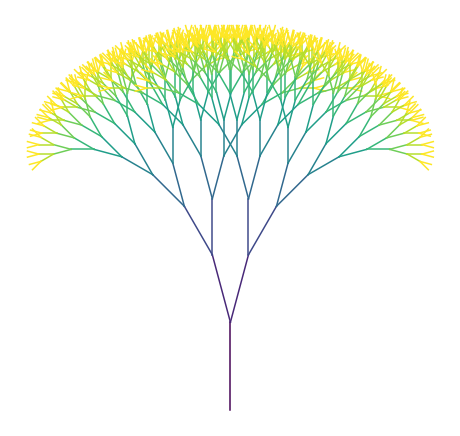

In [148]:
branchOut(0,0,scale_factor,starting_angle,branch_angles,number_of_iterations,0,cmap) # build the tree by initially calling our function

# some improvements to the plot
plt.gca().set_aspect('equal', adjustable='box') # set aspect ratio of plot
plt.gca().axis('off')                           # hide axes
plt.gcf().patch.set_facecolor('white')          # white background of image
plt.gcf().set_size_inches(8,8)                  # set figure size
plt.draw()                                      # update plot

You can copy your resulting figure by pressing SHIFT + click the right mousekey, then choose "copy image". You can now paste it wherever you like.